In [2]:
import numpy as np

URL = "https://gist.githubusercontent.com/ahcamachod/9be09de793dc3bf1e6c3d98eb4e5b1ef/raw/21b85572693200040e11284ef6dcfc3457ec8e11/citrus.csv"
cols = np.arange(1, 6, 1)
data = np.loadtxt(URL, delimiter=",", usecols=cols , skiprows=1)

data

array([[  2.96,  86.76, 172.  ,  85.  ,   2.  ],
       [  3.91,  88.05, 166.  ,  78.  ,   3.  ],
       [  4.42,  95.17, 156.  ,  81.  ,   2.  ],
       ...,
       [ 15.59, 256.5 , 168.  ,  82.  ,  20.  ],
       [ 15.92, 260.14, 142.  ,  72.  ,  11.  ],
       [ 16.45, 261.51, 152.  ,  74.  ,   2.  ]], shape=(10000, 5))

In [3]:
diametros_naranja = data[:5000, 0]
peso_naranja = data[:5000, 1]

diametros_toronja = data[5000:, 0]
peso_toronja = data[5000:, 1]

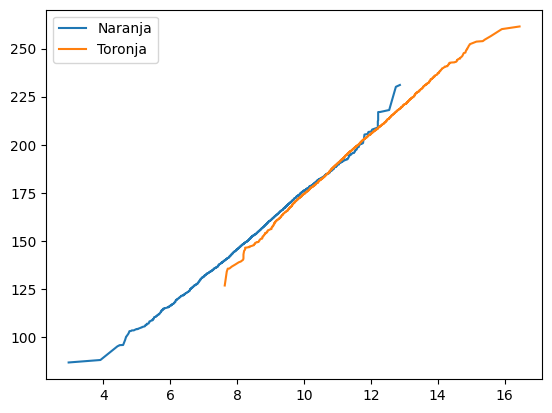

In [5]:
import matplotlib.pyplot as plt

plt.plot(diametros_naranja, peso_naranja)
plt.plot(diametros_toronja, peso_toronja)

plt.legend(["Naranja", "Toronja"])

Ha llegado el momento de poner a prueba los conocimientos adquiridos durante la lección. Continuando con el proyecto de las naranjas/toronjas, ahora debes calcular el coeficiente angular y lineal para la recta de las naranjas y para la recta de las toronjas. Utiliza la fórmula de mínimos cuadrados para encontrar cada uno.

In [6]:
# x = diámetro(naranja o toronja)
# y = peso(naranja o toronja)
# n = número de muestras (naranjas o toronjas)

x = diametros_naranja
y = peso_naranja
n_naranjas= np.size(diametros_naranja)

# Calcular primero la pendiente (m) y el intercepto (b)
m = (n_naranjas * np.sum(x * y) - np.sum(x) * np.sum(y)) / (n_naranjas * np.sum(x**2) - (np.sum(x)**2))

# Calcular la intersección (b)
b = (np.sum(y) - m * np.sum(x)) / n_naranjas

# Ahora obtenemos la ecuación de la recta

z = m * x + b


print(m, b, z, x)


14.7997452319846 27.385603812184137 [ 71.1928497   85.25260767  92.80047774 ... 213.12240647 216.08235552
 217.85832495] [ 2.96  3.91  4.42 ... 12.55 12.75 12.87]


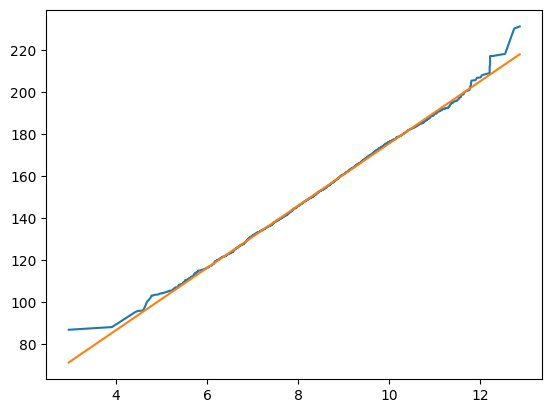

In [7]:
# graficamos la regresion lineal con respecto a los datos de la naranjas

plt.plot(diametros_naranja, peso_naranja)
plt.plot(x, z)


In [9]:
# Ahora las toronjas
x_toronjas = diametros_toronja
y_toronjas = peso_toronja
n_toronjas= np.size(x_toronjas)

# Calcular primero la pendiente (m) y el intercepto (b)
m_toronja = (n_toronjas * np.sum(x * y) - np.sum(x) * np.sum(y)) / (n_toronjas * np.sum(x**2) - (np.sum(x)**2))

# Calcular la intersección (b)
b_toronja = (np.sum(y) - m * np.sum(x)) / n_toronjas

# Ahora obtenemos la ecuación de la recta

z_toronja = m_toronja * x_toronjas + b_toronja
print(m_toronja, b_toronja, z_toronja, x_toronjas)

14.7997452319846 27.385603812184137 [140.30765993 141.19564465 141.639637   ... 258.11363198 262.99754791
 270.84141288] [ 7.63  7.69  7.72 ... 15.59 15.92 16.45]


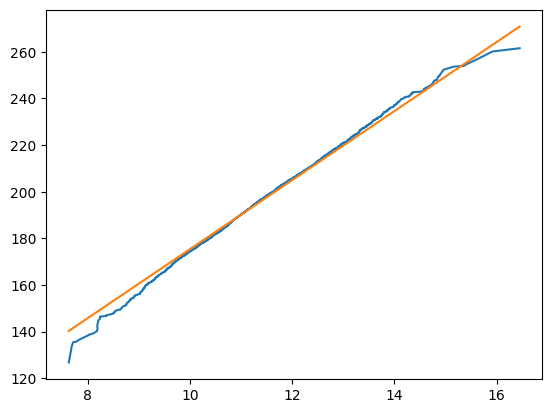

In [11]:
plt.plot(diametros_toronja, peso_toronja)
plt.plot(x_toronjas, z_toronja) # gráfica de la regresión lineal

Ha llegado el momento de poner a prueba los conocimientos adquiridos durante la lección. Continuando con el proyecto de las naranjas/toronjas, ahora debes calcular el coeficiente angular utilizando la generación de números aleatorios. Supongamos que ya conoces el valor de b y que este es igual a 17.

In [14]:

np.random.seed(21)
coeficientes_angulares = np.random.uniform(0.0, 30, 100)

normas_toronja = np.array([])



for i in range(100):
    normas_toronja = np.append(normas_toronja, np.linalg.norm(y_toronjas - (coeficientes_angulares[i] * x_toronjas + 17)))
normas_toronja


array([11627.96261648,  5742.54736838,  4831.27079235, 12291.67691985,
        7779.22294634, 11577.8112165 ,  5420.2977973 ,  3434.41268003,
        5277.25691581,  1468.29590908, 11117.57803688,  8416.52691128,
        9558.72766758,  8459.81240984,   680.12731849,  8325.82011239,
        5761.06606835, 10940.29262146,  5769.84852283,  3413.27959117,
        2814.26778333,  4645.05819593,  6194.01095426,  8090.85931663,
        9536.87342434,  5805.43490155,   176.62167574,  8711.71900905,
        5507.93669948,  5869.04135388,  4809.68151778,  1555.55425848,
         509.25429529,  7498.20155309,  6763.02245416,  4971.2651588 ,
        7973.09077037,  6271.08280963,  2232.77310393,  3161.3413656 ,
        3350.45010247,  2774.22128772,  7014.93515816,  1878.93459618,
        9173.94057879,   824.25904343,  7459.56452002,  8208.05110225,
        6483.34728628,  8912.33810338,  4290.07146373,  1696.28294669,
        5331.10020754,  7257.97631675,  9401.4429431 ,  2995.96004298,
      

In [15]:
datos = np.column_stack((coeficientes_angulares, normas_toronja))
np.savetxt('./resources/normas_toronja.csv', datos, delimiter=',')

# BroadCasting
El broadcasting es una funcionalidad de NumPy que permite trabajar con operaciones en arrays de formas y tamaños diferentes, sin necesidad de crear copias de los datos

In [ ]:
import numpy as np
a = np.array([[1,2],[3,4]])
b = np.array([10,20])
a + b
# En el ejemplo anterior, estamos trabajando con la suma de dos arrays con dimensiones diferentes, en este caso, un array bidimensional y un array unidimensional. Sin embargo, NumPy puede analizar las dimensiones a través de reglas preestablecidas y ejecutar la operación, retornando:
# Aqui lo que hace numpy para sumar las matrices es que toma el array unidimensional y lo extiende a la forma del array bidimensional, de modo que la suma se realiza elemento a elemento. En este caso, el array unidimensional se convierte en un array bidimensional de la siguiente manera:
# [10, 20] se convierte en:
# array([[10,20],[10,20]])
# y luego se suma elemento a elemento con el array bidimensional:
# array([[1,2],
# 	   [3,4]])
# lo que da como resultado:
# array([[11,22],
# 	   [13,24]])

array([[11, 22],
       [13, 24]])